# 0.Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram


from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


# 1.Clustering por tienda

In [2]:
df= pd.read_csv("/Users/santi/Documents/csv/datos_arreglados.csv",index_col=0)

df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

In [3]:
df.head()

,item,category,department,stores,region,week,year,is_holidays,units_sold,sell_price,total_sales
date,,,,,,,,,,,
2013-07-08,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,0,0,12.7414,0.0000
2013-07-15,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,1,0,12.7414,0.0000
2013-07-22,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,29,2013,0,4,10.9858,43.9432
2013-07-29,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,30,2013,0,6,10.9858,65.9148
2013-08-05,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,31,2013,0,0,10.9858,0.0000


In [4]:
df_tiendas = df.groupby(["stores"]).agg({"region":"first",
                                        "units_sold":"sum",
                                        "sell_price":"mean",
                                        "total_sales":"sum"}).reset_index()

df_tiendas

,stores,region,units_sold,sell_price,total_sales
0,Back_Bay(BOS_3),Boston,6057234,5.484508,2.181127e+07
1,Brooklyn(NYC_4),New York,4082201,5.522663,1.495885e+07
2,Greenwich_Village(NYC_1),New York,7657224,5.516056,2.757273e+07
3,Harlem(NYC_2),New York,5647131,5.576188,2.135534e+07
4,Midtown_Village(PHI_1),Philadelphia,5115653,5.580032,1.811085e+07
5,Queen_Village(PHI_3),Philadelphia,6391946,5.520492,2.063028e+07
6,Roxbury(BOS_2),Boston,7178136,5.455508,2.512650e+07
7,South_End(BOS_1),Boston,5567261,5.465372,1.923361e+07
8,Tribeca(NYC_3),New York,11134789,5.483638,3.928694e+07
9,Yorktown(PHI_2),Philadelphia,6506176,5.555507,2.152227e+07


In [5]:
df_perc = pd.crosstab(df["stores"],df["category"],values=df["total_sales"], aggfunc="sum",normalize="index").reset_index()
df_perc 

category,stores,ACCESORIES,HOME_&_GARDEN,SUPERMARKET
0,Back_Bay(BOS_3),0.154744,0.290987,0.554269
1,Brooklyn(NYC_4),0.165118,0.256545,0.578337
2,Greenwich_Village(NYC_1),0.151246,0.269476,0.579278
3,Harlem(NYC_2),0.133760,0.389210,0.477030
4,Midtown_Village(PHI_1),0.170094,0.284054,0.545852
5,Queen_Village(PHI_3),0.104145,0.274484,0.621371
6,Roxbury(BOS_2),0.139968,0.293489,0.566543
7,South_End(BOS_1),0.113305,0.325477,0.561218
8,Tribeca(NYC_3),0.113925,0.332989,0.553085
9,Yorktown(PHI_2),0.086750,0.281245,0.632005


In [6]:
df_cluster_tiendas= df_tiendas.merge(df_perc,on="stores")
df_cluster_tiendas.head()

,stores,region,units_sold,sell_price,total_sales,ACCESORIES,HOME_&_GARDEN,SUPERMARKET
0,Back_Bay(BOS_3),Boston,6057234,5.484508,2.181127e+07,0.154744,0.290987,0.554269
1,Brooklyn(NYC_4),New York,4082201,5.522663,1.495885e+07,0.165118,0.256545,0.578337
2,Greenwich_Village(NYC_1),New York,7657224,5.516056,2.757273e+07,0.151246,0.269476,0.579278
3,Harlem(NYC_2),New York,5647131,5.576188,2.135534e+07,0.133760,0.389210,0.477030
4,Midtown_Village(PHI_1),Philadelphia,5115653,5.580032,1.811085e+07,0.170094,0.284054,0.545852


/var/folders/h2/m__59kjn7y17pxmn41zlkfsm0000gn/T/ipykernel_29931/3964144302.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cluster_tiendas.corr(), annot=True, cmap="YlGnBu")


<Axes: >

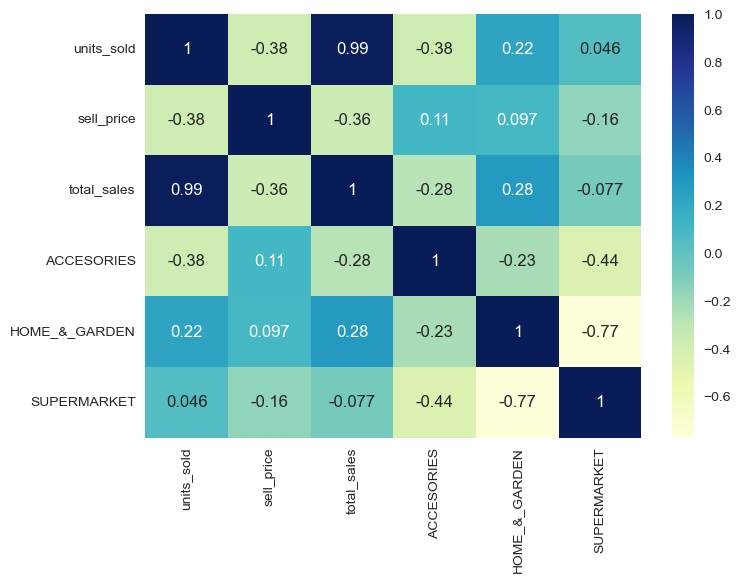

In [7]:
sns.heatmap(df_cluster_tiendas.corr(), annot=True, cmap="YlGnBu")

In [8]:
df_cluster= df_cluster_tiendas.copy()

In [9]:
df_cluster.drop(columns=["total_sales","HOME_&_GARDEN","region"],inplace=True)
tiendas = df_cluster.pop("stores")
tiendas

0             Back_Bay(BOS_3)
1             Brooklyn(NYC_4)
2    Greenwich_Village(NYC_1)
3               Harlem(NYC_2)
4      Midtown_Village(PHI_1)
5        Queen_Village(PHI_3)
6              Roxbury(BOS_2)
7            South_End(BOS_1)
8              Tribeca(NYC_3)
9             Yorktown(PHI_2)
Name: stores, dtype: object

In [10]:
ss = StandardScaler()
df_cluster_ss = pd.DataFrame(
    ss.fit_transform(df_cluster),
    columns=df_cluster.columns)
df_cluster_ss

,units_sold,sell_price,ACCESORIES,SUPERMARKET
0,-0.262981,-0.750375,0.811173,-0.311947
1,-1.352909,0.158874,1.203697,0.282505
2,0.619979,0.001414,0.678823,0.305753
3,-0.489297,1.434361,0.017194,-2.219681
4,-0.782595,1.525974,1.391987,-0.519833
5,-0.078269,0.107134,-1.103348,1.345410
6,0.355593,-1.441436,0.252084,-0.008785
7,-0.533374,-1.206382,-0.756771,-0.140309
8,2.539084,-0.771115,-0.733294,-0.341183
9,-0.015231,0.941550,-1.761545,1.608069


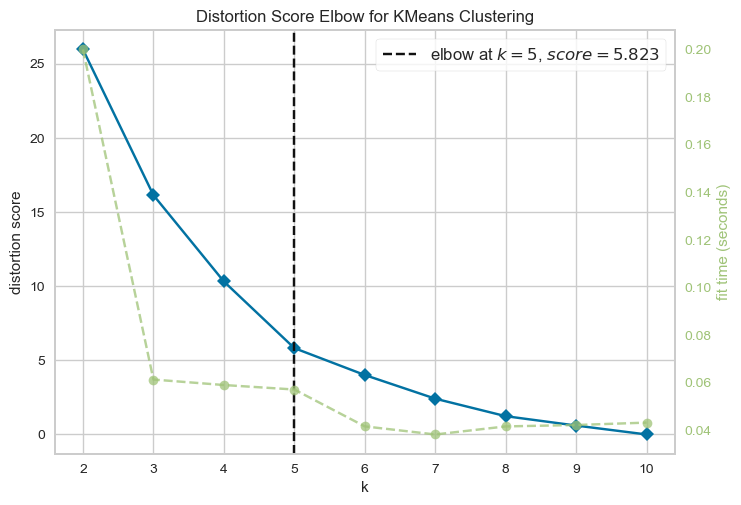

In [11]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42, init="random", n_init="auto"), k=10)
Elbow_M.fit(df_cluster_ss)
Elbow_M.show();

In [12]:
import plotly.express as px

silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, init="random", n_init="auto")
    kmeans.fit(df_cluster_ss)
    silhouette_scores.append(silhouette_score(df_cluster_ss, kmeans.labels_))

fig = px.line(
    x=range(2, 10),
    y=silhouette_scores,
    title="Silhouette score",
    labels={"x": "k", "y": "Silhouette score"},
)
fig.show()

In [13]:
kmeans= KMeans(n_clusters=3,random_state=42, init="random", n_init="auto")
kmeans.fit(df_cluster_ss)
df_cluster_tiendas["cluster"] = kmeans.labels_

/Users/santi/anaconda3/envs/Nuclio/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



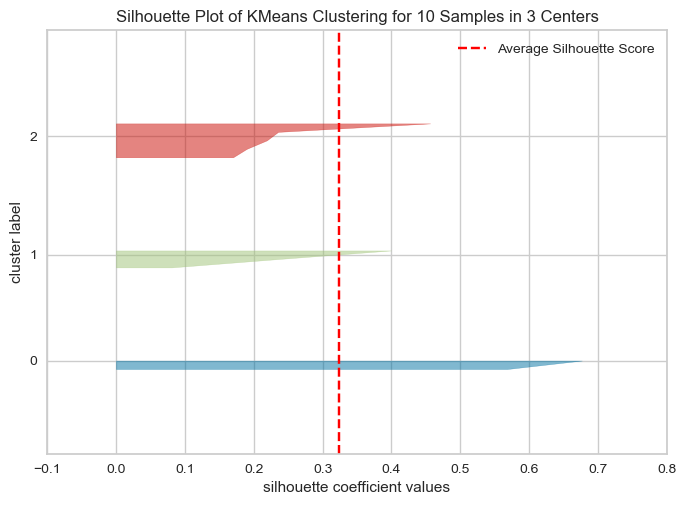

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df_cluster_ss)  
visualizer.show()

In [15]:
df_cluster_tiendas

,stores,region,units_sold,sell_price,total_sales,ACCESORIES,HOME_&_GARDEN,SUPERMARKET,cluster
0,Back_Bay(BOS_3),Boston,6057234,5.484508,2.181127e+07,0.154744,0.290987,0.554269,2
1,Brooklyn(NYC_4),New York,4082201,5.522663,1.495885e+07,0.165118,0.256545,0.578337,1
2,Greenwich_Village(NYC_1),New York,7657224,5.516056,2.757273e+07,0.151246,0.269476,0.579278,2
3,Harlem(NYC_2),New York,5647131,5.576188,2.135534e+07,0.133760,0.389210,0.477030,1
4,Midtown_Village(PHI_1),Philadelphia,5115653,5.580032,1.811085e+07,0.170094,0.284054,0.545852,1
5,Queen_Village(PHI_3),Philadelphia,6391946,5.520492,2.063028e+07,0.104145,0.274484,0.621371,0
6,Roxbury(BOS_2),Boston,7178136,5.455508,2.512650e+07,0.139968,0.293489,0.566543,2
7,South_End(BOS_1),Boston,5567261,5.465372,1.923361e+07,0.113305,0.325477,0.561218,2
8,Tribeca(NYC_3),New York,11134789,5.483638,3.928694e+07,0.113925,0.332989,0.553085,2
9,Yorktown(PHI_2),Philadelphia,6506176,5.555507,2.152227e+07,0.086750,0.281245,0.632005,0


In [17]:
# Calcula la matriz de enlace utilizando el método de agrupamiento y la distancia definidos
Z = linkage(df_cluster_ss, method='complete', metric='euclidean')

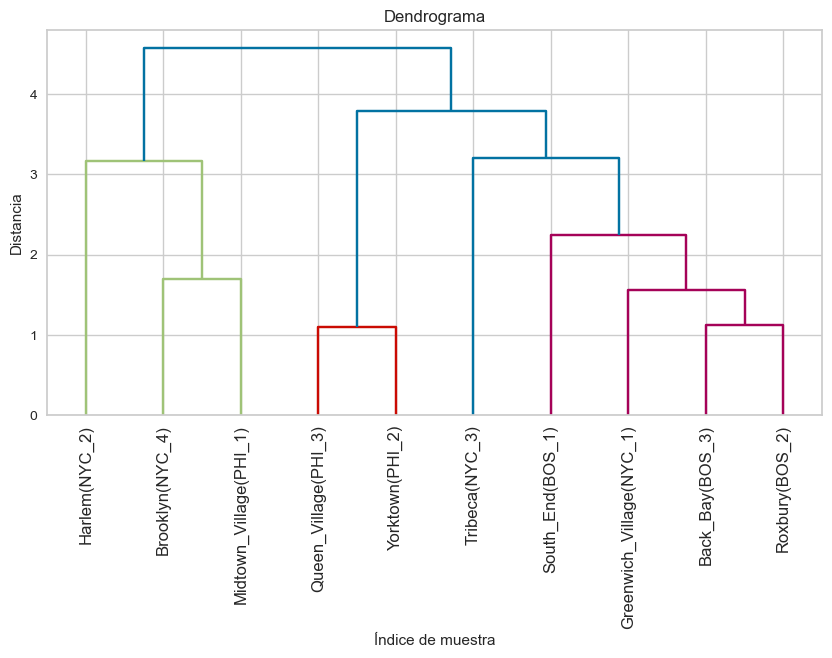

In [18]:
ordered_labels = [tiendas[i] for i in range(len(tiendas))]

# Visualiza el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z,labels=ordered_labels)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.xticks(rotation=90)
plt.ylabel('Distancia')
plt.show()